**Pytrend** Library for get data from google trend





In [1]:
!pip install pytrends

In [2]:
from pytrends.request import TrendReq
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import networkx as nx 
%matplotlib inline
import plotly.express as px

In [3]:
##Install thai font
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

--2020-11-29 05:24:05--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2020-11-29 05:24:06--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.02s   

2020-11-29 05:24:06 (5.13 MB/s) - ‘thsara

In [4]:
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family= 'TH Sarabun New')

In [5]:
pytrends = TrendReq()

Trending search an API methods for show keywords which most popular in the last few day. We are also can select the Countries we are interested in. Let's try to explore in Thailand.

In [6]:
trending_searches_df = pytrends.trending_searches(pn='thailand')
print(trending_searches_df)

                                 0
0            เรอัลมาดริด พบ อลาเบส
1         ฟุตบอลพรีเมียร์ลีกอังกฤษ
2                       ลิเวอร์พูล
3                      ก้อย-รัชวิน
4             เอฟเวอร์ตัน พบ ลีดส์
5                   โควิดเชียงใหม่
6                   งานแต่งก้อยตูน
7                  กรมทหารราบที่ 1
8                        Liverpool
9                           รถเมล์
10                       ชุดไปรเวท
11                      หนึ่งบางปู
12                    คริสตัลพาเลซ
13          ไบรท์ตัน พบ ลิเวอร์พูล
14               ถามตรงๆกับจอมขวัญ
15  เชียงราย ยูไนเต็ด พบ เอฟซี โซล
16                         สเปอร์ส
17          ตราบฟ้ามีตะวันตอนที่ 3
18                      ม็อบวันนี้
19                        บีจีปทุม


Let's see the trending of today by today_searches function.

In [221]:
today_searches_df = pytrends.today_searches(pn='TH')
print(today_searches_df.head(20))

0    ฟุตบอลพรีเมียร์ลีกอังกฤษ
1                       ราบ11
2                 ก้อย รัชวิน
Name: query, dtype: object


Let's continue with interest_over_time API method. An API method which return the historical of defined keyword with score each past day. We will try to explore popularity of two big e-commerce companies in Thailand.

In [7]:
## Define keyword
kw_sp = ['shopee']
# Create payload and capture API tokens. Only needed for interest_over_time, interest_by_region and related_queries
pytrends.build_payload(kw_sp, cat= 0, timeframe= 'today 1-m', geo= 'TH', gprop= '') 

In [ ]:
df_sp = pytrends.interest_over_time()
df_sp['store'] = 'Shopee'
df_sp.rename(columns={'shopee' : 'Score'}, inplace= True)
df_sp.head(5)

In [9]:
pytrends2 = TrendReq()

In [10]:
kw_lz = ['lazada']
pytrends2.build_payload(kw_lz, cat= 0, timeframe= 'today 1-m', geo= 'TH', gprop= '')

In [ ]:
df_lz = pytrends2.interest_over_time()
df_lz['store'] = 'Lazada'
df_lz.rename(columns={'lazada' : 'Score'}, inplace= True)
df_lz.head(5)

In [ ]:
## Bring both tables together for plot the graph
df_ecom = pd.concat([df_sp, df_lz])
df_ecom

As you see from the graph both of these e-commerce companies has highest search score on November 11 since that day there was a big sale event 11.11. If we try to look on another day shopee is more popular than lazada. But that makes us unable to judge because we have to survey a number of users on there applications too. 

In [13]:
px.line(x= df_ecom.index, y= df_ecom['Score'], 
        title= 'E-commerce Searh Trend', 
        color= df_ecom['store'], 
        labels= {'x': 'Date', 'y': 'Score'})


Next let's get the related queries of our keywords by related_queries function where top will return the top overall keywords and rising return the keyword which becoming popular. We will try to explore what users search about shopee and lazada.  

In [14]:
topicsp = pytrends.related_queries()

In [ ]:
## Take data from dict to dataframe
sp_rising = pd.DataFrame.from_dict(topicsp['shopee']['rising'])

Text(0.5, 0, 'Keywords')

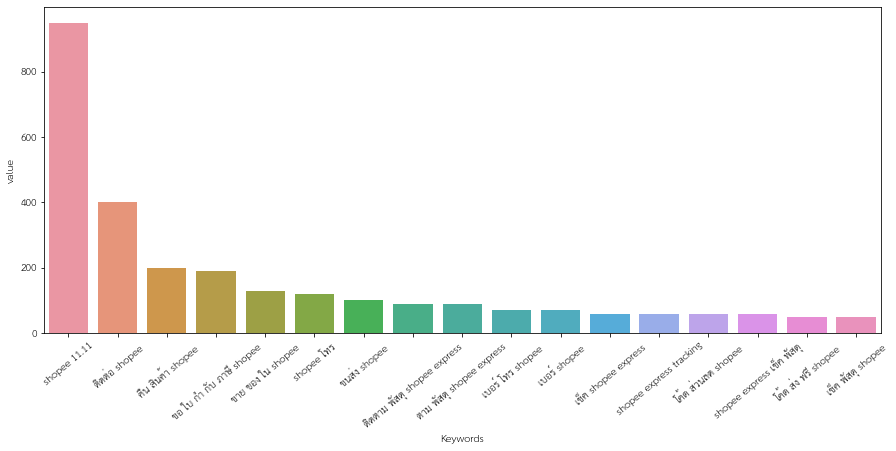

In [29]:
fig = plt.figure(figsize=(15, 6))
sns.barplot(x= sp_rising['query'], y= sp_rising['value'])
plt.xticks(rotation= 40)
plt.xlabel('Keywords')

In [25]:
## Take data from dict to dataframe
sp_top = pd.DataFrame.from_dict(topicsp['shopee']['top'])

Text(0.5, 0, 'Keywords')

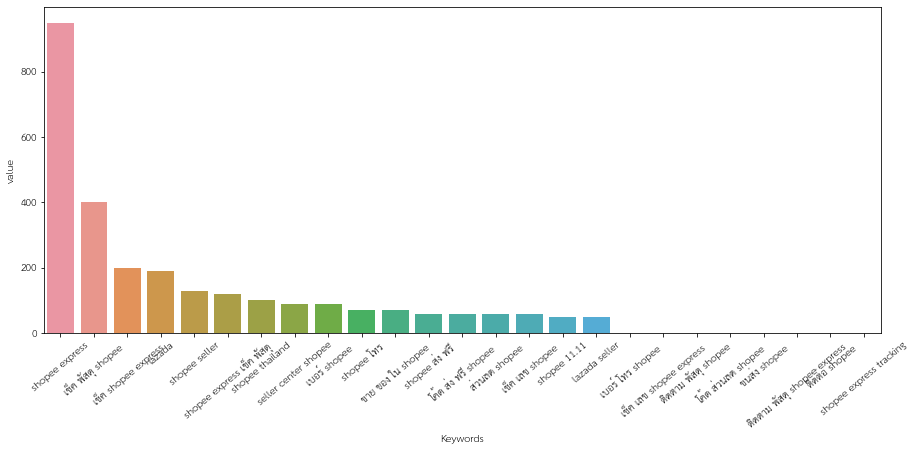

In [28]:
fig = plt.figure(figsize=(15, 6))
sns.barplot(x= sp_top['query'], y= sp_rising['value'])
plt.xticks(rotation= 40)
plt.xlabel('Keywords')

In [30]:
topiclz = pytrends2.related_queries()

In [ ]:
topiclz

In [32]:
## Take data from dict to dataframe
lz_rising = pd.DataFrame.from_dict(topiclz['lazada']['rising'])

Text(0.5, 0, 'Keywords')

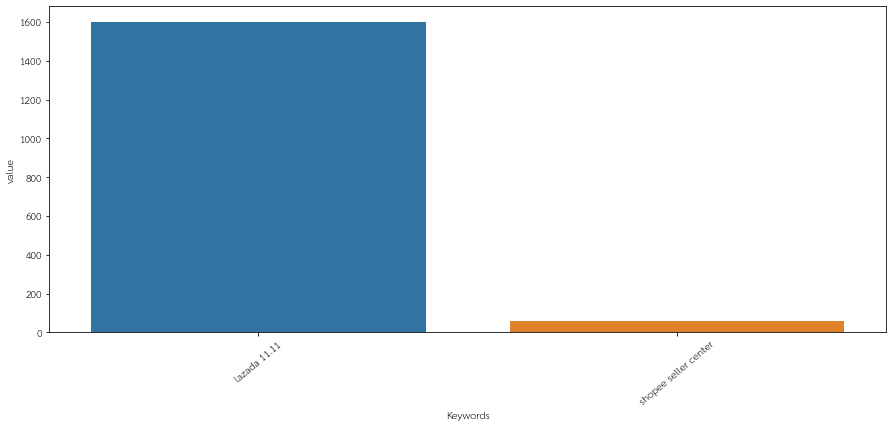

In [33]:
fig = plt.figure(figsize=(15, 6))
sns.barplot(x= lz_rising['query'], y= lz_rising['value'])
plt.xticks(rotation= 40)
plt.xlabel('Keywords')

In [34]:
## Take data from dict to dataframe
lz_top = pd.DataFrame.from_dict(topiclz['lazada']['top'])

Text(0.5, 0, 'Keywords')

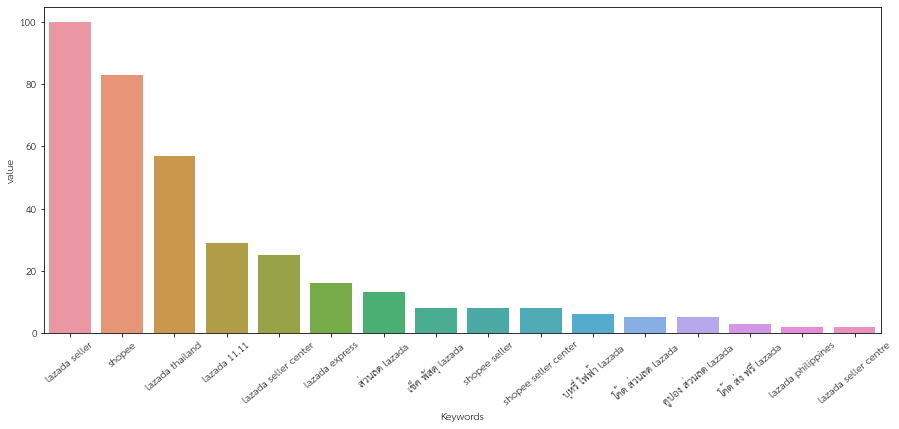

In [35]:
fig = plt.figure(figsize=(15, 6))
sns.barplot(x= lz_top['query'], y= lz_top['value'])
plt.xticks(rotation= 40)
plt.xlabel('Keywords')

After we explored the related keywords of both companies. We can see that the top rank of rising keywords are about 11.11 promotion same. In the section of top related keywords. For shopee mostly users were search about shopee express which are transportation service of shopee, contact channel and promotion. For lazada mostly users were search about lazada seller(How to become a store on lazada platform), contact channel, promotion and transportation service(track number check). It seems like   shopee, users are searching about transportation services more than lazada. However, some of those keyword may indicate 
what services will the company need to improve further.

And last we'll get the keywords from related queries to continue search. This time we'll try to change the keyword to iphone 12 which recently launch a few day ago.

In [37]:
pytrends3 = TrendReq()

In [182]:
##Define new key word
seed_kw = 'iphone 12'
kw_list = [seed_kw]
pytrends3.build_payload(kw_list, cat= 0, timeframe= 'today 1-m', geo= 'TH', gprop= '')

queries = pytrends3.related_queries()
df_ip = pd.DataFrame.from_dict(queries['iphone 12']['rising'])
df_ip['Keywords'] = seed_kw

In [183]:
df_ip

,query,value,Keywords
0,ais จอง iphone 12,750,iphone 12
1,จอง iphone 12 true,600,iphone 12
2,truemove,600,iphone 12
3,ais iphone 12 pro,550,iphone 12
4,dtac,500,iphone 12
5,iphone 12 dtac,500,iphone 12
6,true iphone 12,450,iphone 12
7,ais iphone 12,400,iphone 12
8,จอง iphone 12,400,iphone 12
9,จอง iphone 12 dtac,350,iphone 12


In [184]:
#prepare the list for the next search
kw_list = df_ip['query'].head(5).to_list()
org_kw_list = kw_list
kw_list = [kw.replace(seed_kw, '') for kw in kw_list]
kw_list = [kw.replace('', '') for kw in kw_list]
kw_dict = dict(zip(kw_list, org_kw_list))

In [211]:
expanded_queries

{'ais  pro': {'rising':                    query  value
  0          ais iphone 12    600
  1      iphone 12 pro max    450
  2              iphone 12    400
  3  iphone 12 pro max ais    350, 'top':                    query  value
  0          ais iphone 12    100
  1              iphone 12     86
  2          iphone 11 pro     74
  3      iphone 11 pro ais     72
  4  iphone 12 pro max ais     50
  5  iphone 11 pro max ais     43
  6      iphone 12 pro max     40
  7      iphone 11 pro max     38
  8          ไอ โฟน 11 pro     36},
 'ais จอง': {'rising':                query  value
  0      จอง iphone 12    250
  1  จอง iphone 12 ais    200
  2  จอง ไอ โฟน 12 ais    140, 'top':                query  value
  0      จอง iphone 12    100
  1  จอง iphone 12 ais     89
  2  จอง ไอ โฟน 12 ais     67},
 'dtac': {'rising':                         query  value
  0          จอง iphone 12 dtac  51650
  1              www.dtac.co.th  30650
  2         dtac co th หมอ ช้าง  23750
  3   www dtac co

In [210]:
pytrends3.build_payload(kw_list, cat=0, timeframe='today 1-m' , geo='TH', gprop='')
expanded_queries = pytrends3.related_queries()

From the iphone 12 keyword rising result you can see user mostly search keyword with telecommunication company name. Which those companies are the official iphone dealer. For now AIS is the most popular, followed by TRUE and DTAC.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

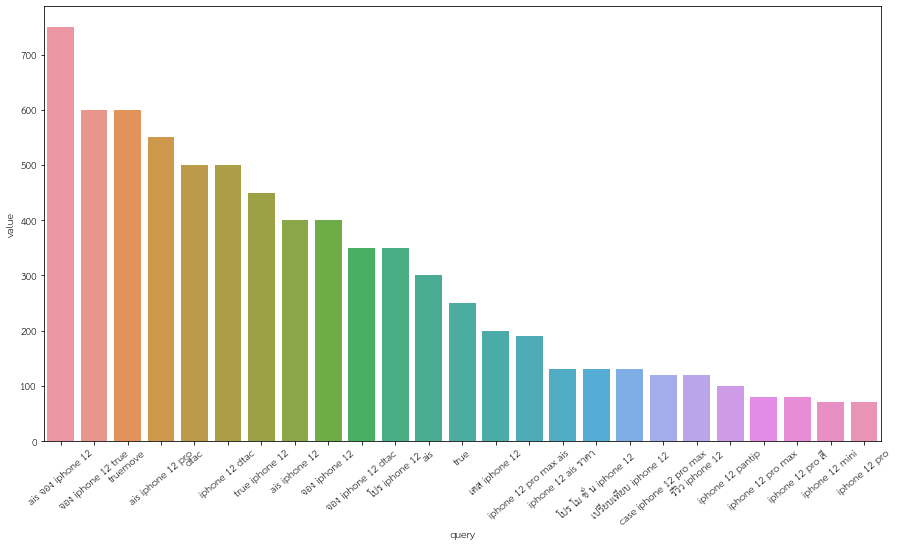

In [187]:
fig = plt.figure(figsize=(15, 8))
sns.barplot(x= df_ip['query'], y= df_ip['value'])
plt.xticks(rotation= 40)

In [ ]:
##Prepare dataframe for plot network graph
df_ip12 = pd.DataFrame.from_dict(queries['iphone 12']['rising'])
df_ip12['keyword'] = 'iphone 12'

In [217]:
df_q1 = pd.DataFrame.from_dict(expanded_queries['ais จอง']['rising'])
df_q1['keyword'] = 'ais จอง iphone 12'

In [212]:
df_q2 = pd.DataFrame.from_dict(expanded_queries['จอง  true']['rising'])
df_q2['keyword'] = 'จอง iphone 12 true'

In [213]:
df_q3 = pd.DataFrame.from_dict(expanded_queries['truemove']['rising'])
df_q3['keyword'] = 'truemove'

In [214]:
df_q4 = pd.DataFrame.from_dict(expanded_queries['ais  pro']['rising'])
df_q4['keyword'] = 'ais iphone 12 pro'

In [215]:
df_q5 = pd.DataFrame.from_dict(expanded_queries['dtac']['rising'])
df_q5['keyword'] = 'dtac'

In [218]:
## Bring dataframe which contain each keywords together
df_con = pd.concat([df_ip12, df_q1, df_q2, df_q3, df_q4, df_q5])
df_con

,query,value,keyword
0,truemove,37300.0,iphone 12
1,iphone 12 studio,26900.0,iphone 12
2,case iphone 12 pro max,23150.0,iphone 12
3,ais จอง iphone 12,1250.0,iphone 12
4,dtac iphone 12,500.0,iphone 12
5,dtac,500.0,iphone 12
6,iphone 12 pro max ais,450.0,iphone 12
7,เคส iphone 12,450.0,iphone 12
8,จอง iphone 12 true,400.0,iphone 12
9,ais iphone 12 pro,350.0,iphone 12


This graph show you the top 5 expanded queries from iphone 12 keyword. Which can be seen that some of key word are not related with iphone 12.

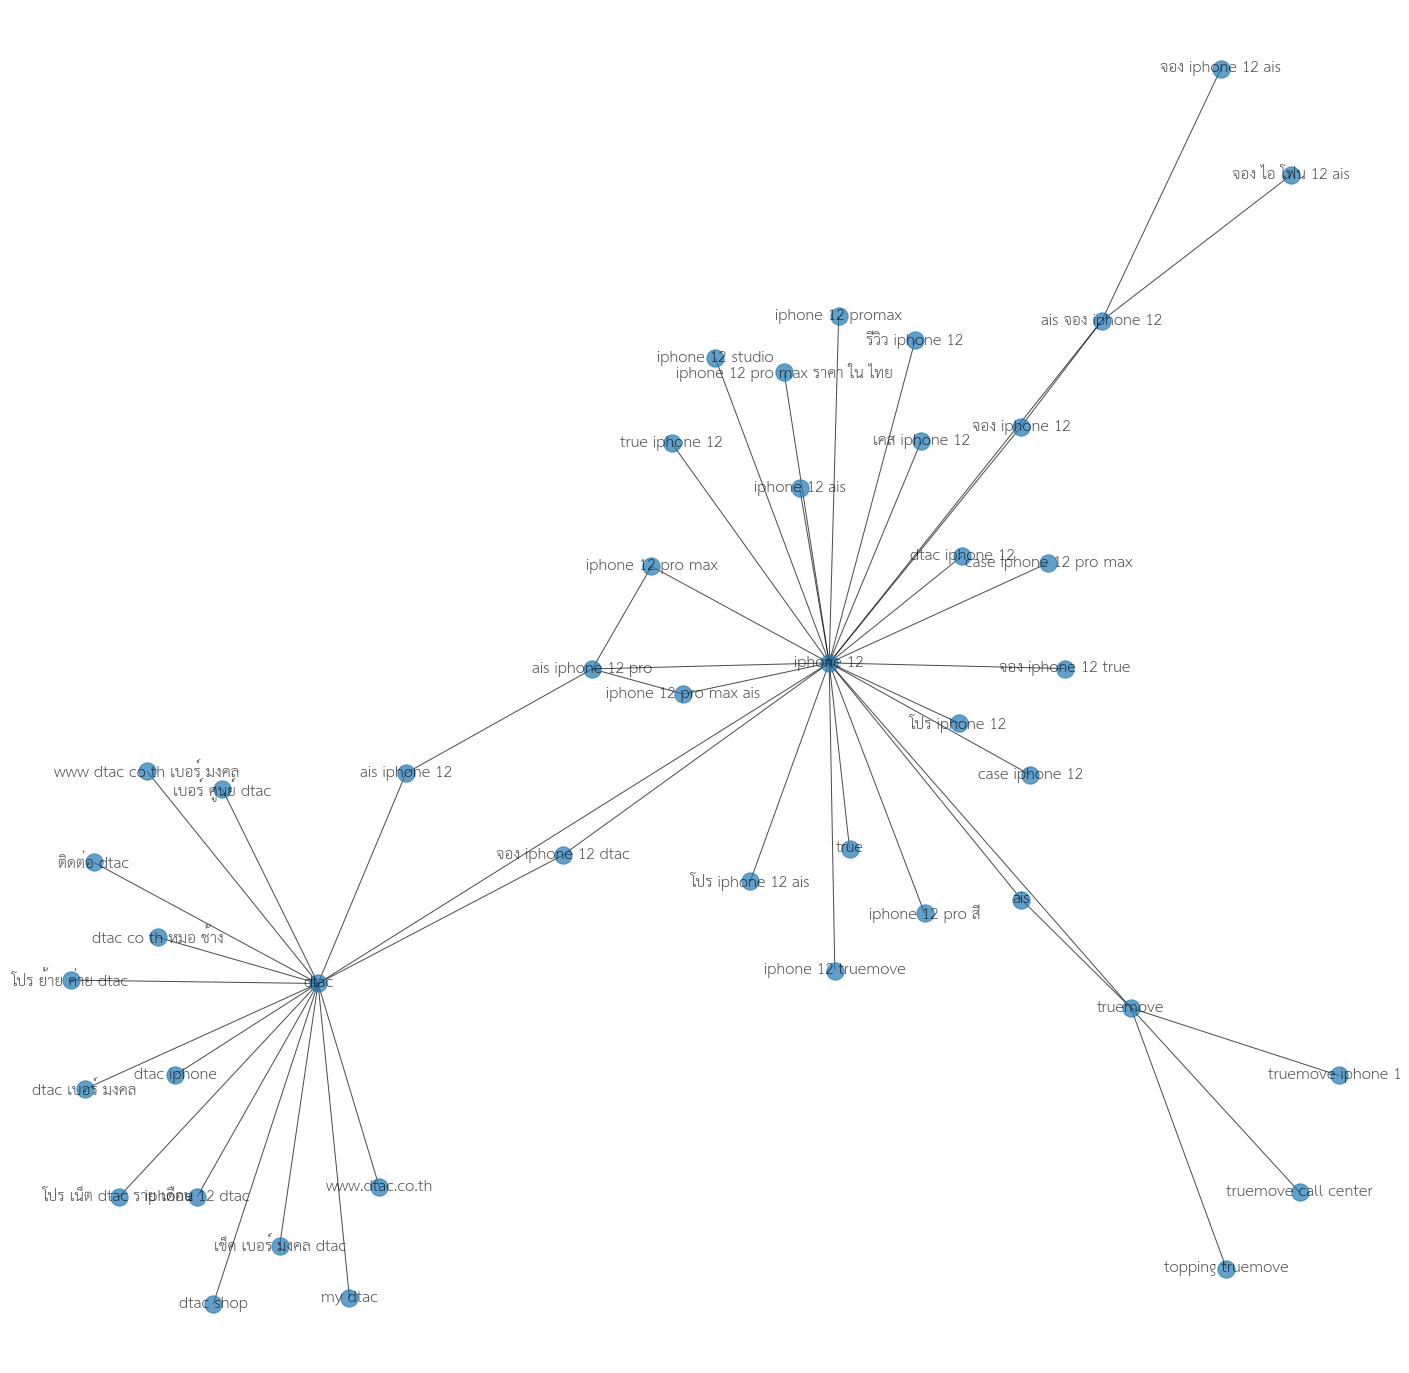

In [219]:
fig, ax=plt.subplots(figsize=(25,25))
G=nx.from_pandas_edgelist(df_con ,source='keyword', target='query')
pos = nx.spring_layout(G,k=10,iterations=20)  
labels_params = {"font_family":"TH Sarabun New", "alpha":.7, "font_size":15 }
nx.draw_spring(G, with_labels=True, **labels_params)
plt.show()

**Credit :** 
*   https://medium.com/@thanachart.rit/%E0%B9%80%E0%B8%82%E0%B8%B5%E0%B8%A2%E0%B8%99-python-%E0%B8%95%E0%B9%88%E0%B8%AD-google-trends-api-%E0%B9%81%E0%B8%A5%E0%B8%B0%E0%B9%81%E0%B8%AA%E0%B8%94%E0%B8%87%E0%B8%9C%E0%B8%A5%E0%B9%81%E0%B8%9A%E0%B8%9A-network-graph-a9be0f7b0d28

*   https://predictivehacks.com/get-google-trends-using-python/



